# Lista 04

In [1]:
%matplotlib inline
import numpy as np
import transform as t
import resample as r
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
from sklearn import metrics, linear_model, svm, ensemble

## 1. Crie os seguintes arquivos com extensão .py e implemente os métodos definidos para cada um deles:
    transform.py
        standardize
        normalize
    resample.py
        split_k_fold(n_elem, n_splits=3, shuffle=True, seed=0)
            n_elem - número total de elementos.
            n_split - número de folds. Mínimo: 2.
            shuffle - aleatoriza a ordem dos dados (True) ou não (False).
            seed - determina uma semente para geração de números aleatórios ou não (None).

            Retorno: 2 arrays (idx_train e idx_test), cada um com n_splits elementos: 
                Exemplo para n_splits=3, teremos idx_train[0], idx_train[1] e idx_train[2].
                Exemplo para n_splits=3, teremos idx_test[0], idx_test[1] e idx_test[2].

In [2]:
# TESTE
X = np.array([0,1,2,3,4,5])
X_std = t.standarlize(X)
X_norm = t.normalize(X)

X_std, X_norm

(array([-1.46385011, -0.87831007, -0.29277002,  0.29277002,  0.87831007,
         1.46385011]), array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]))

In [3]:
# TESTE 2
#idx_treino, idx_teste = r.split_k_fold(len(X), 5, True, 0)

#idx_treino, idx_teste

# 2. Use sua implementação de split_k_fold a fim de fazer Cross Validation com k=5 (5-Fold) para obter o MSE de regressões para o seguinte dataset sobre a qualidade de vinhos tintos (winequality-red.csv). Compare as seguintes técnicas de regressão (pode usar as implementações do Scikit Learn):


In [4]:
# TESTE

data = np.genfromtxt("winequality-red.csv", delimiter=";", skip_header=1)

idx_train, idx_test = r.split_k_fold(data.shape[0], 5, True, 0)

data.shape, len(idx_train), len(idx_test)

((1599, 12), 5, 5)

In [5]:
# FORMATANDO OS DADOS PARA AS CRIAÇÔES DOS MODELOS

X = data[:, 0]
y = data[:, 1]

X_f = [[i] for i in X]
y_f = [[i] for i in y]

Xtrain = []
ytrain = []
Xtest = []
ytest = []

for i in range(len(idx_train)):
    Xtrain.append(X[idx_train[i]])
    ytrain.append(y[idx_train[i]])

for i in range(len(idx_test)):
    Xtest.append(X[idx_test[i]])
    ytest.append(y[idx_test[i]])

X_train = []
y_train = []
X_test = []
y_test = []

for i in range(len(Xtrain)):
    X_train.append([[i] for i in Xtrain[i]])
    y_train.append([[i] for i in ytrain[i]])

for i in range(len(Xtest)):
    X_test.append([[i] for i in Xtest[i]])
    y_test.append([[i] for i in ytest[i]])

## SGD - Stochastic Gradient Descent Regressor
(http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [6]:
# MODELO DO 0
modelSGD_0 = linear_model.SGDRegressor()
modelSGD_0.fit(X_train[0], y_train[0])
y1_pred_0 = modelSGD_0.predict(X_test[0])
mse1_0 = metrics.mean_squared_error(y_test[0], y1_pred_0)
#score1_0 = modelSGD_0.score(X_test[0], y_test[0])  

# MODELO DO 1
modelSGD_1 = linear_model.SGDRegressor()
modelSGD_1.fit(X_train[1], y_train[1])
y1_pred_1 = modelSGD_1.predict(X_test[1])
mse1_1 = metrics.mean_squared_error(y_test[1], y1_pred_1)
#score1_1 = modelSGD_1.score(X_test[1], y_test[1])

# MODELO DO 2
modelSGD_2 = linear_model.SGDRegressor()
modelSGD_2.fit(X_train[2], y_train[2])
y1_pred_2 = modelSGD_2.predict(X_test[2])
mse1_2 = metrics.mean_squared_error(y_test[2], y1_pred_2)
#score1_2 = modelSGD_2.score(X_test[2], y_test[2])

# MODELO DO 3
modelSGD_3 = linear_model.SGDRegressor()
modelSGD_3.fit(X_train[3], y_train[3])
y1_pred_3 = modelSGD_3.predict(X_test[3])
mse1_3 = metrics.mean_squared_error(y_test[3], y1_pred_3)
#score1_3 = modelSGD_3.score(X_test[3], y_test[3])

# MODELO DO 4
modelSGD_4 = linear_model.SGDRegressor()
modelSGD_4.fit(X_train[4], y_train[4])
y1_pred_4 = modelSGD_4.predict(X_test[4])
mse1_4 = metrics.mean_squared_error(y_test[4], y1_pred_4)
#score1_4 = modelSGD_4.score(X_test[4], y_test[4])

mseSGD = (mse1_0 + mse1_1 + mse1_2 + mse1_3 + mse1_4) / 5
#scoreSGD = (score1_0 + score1_1 + score1_2 + score1_3 + score1_4) / 5

print("SGD --> MSE = {}".format(mseSGD))

SGD --> MSE = 0.044315320602397734


## Linear Regression
(http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [7]:
# MODELO DO 0
modelLR_0 = linear_model.LinearRegression()
modelLR_0.fit(X_train[0], y_train[0])
y2_pred_0 = modelLR_0.predict(X_test[0])
mse2_0 = metrics.mean_squared_error(y_test[0], y2_pred_0)
#score2_0 = modelLR_0.score(X_test[0], y_test[0])

# MODELO DO 1
modelLR_1 = linear_model.LinearRegression()
modelLR_1.fit(X_train[1], y_train[1])
y2_pred_1 = modelLR_1.predict(X_test[1])
mse2_1 = metrics.mean_squared_error(y_test[1], y2_pred_1)
#score2_1 = modelLR_1.score(X_test[1], y_test[1])

# MODELO DO 2
modelLR_2 = linear_model.LinearRegression()
modelLR_2.fit(X_train[2], y_train[2])
y2_pred_2 = modelLR_2.predict(X_test[2])
mse2_2 = metrics.mean_squared_error(y_test[2], y2_pred_2)
#score2_2 = modelLR_2.score(X_test[2], y_test[2])

# MODELO DO 3
modelLR_3 = linear_model.LinearRegression()
modelLR_3.fit(X_train[3], y_train[3])
y2_pred_3 = modelLR_3.predict(X_test[3])
mse2_3 = metrics.mean_squared_error(y_test[3], y2_pred_3)
#score2_3 = modelLR_3.score(X_test[3], y_test[3])

# MODELO DO 4
modelLR_4 = linear_model.LinearRegression()
modelLR_4.fit(X_train[4], y_train[4])
y2_pred_4 = modelLR_4.predict(X_test[4])
mse2_4 = metrics.mean_squared_error(y_test[4], y2_pred_4)
#score2_4 = modelLR_4.score(X_test[4], y_test[4])

mseLR = (mse2_0 + mse2_1 + mse2_2 + mse2_3 + mse2_4) / 5
#scoreLR = (score2_0 + score2_1 + score2_2 + score2_3 + score2_4) / 5

print("LR --> MSE = {}".format(mseLR))

LR --> MSE = 0.02993049703495957


## Linear SVR
(http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR)

In [8]:
# MODELO DO 0
modelLSVR_0 = svm.LinearSVR()
modelLSVR_0.fit(X_train[0], y_train[0])
y3_pred_0 = modelLSVR_0.predict(X_test[0])
mse3_0 = metrics.mean_squared_error(y_test[0], y3_pred_0)
#score3_0 = modelLSVR_0.score(X_test[0], y_test[0])

# MODELO DO 1
modelLSVR_1 = svm.LinearSVR()
modelLSVR_1.fit(X_train[1], y_train[1])
y3_pred_1 = modelLSVR_1.predict(X_test[1])
mse3_1 = metrics.mean_squared_error(y_test[1], y3_pred_1)
#score3_1 = modelLSVR_1.score(X_test[1], y_test[1])

# MODELO DO 2
modelLSVR_2 = svm.LinearSVR()
modelLSVR_2.fit(X_train[2], y_train[2])
y3_pred_2 = modelLSVR_2.predict(X_test[2])
mse3_2 = metrics.mean_squared_error(y_test[2], y3_pred_2)
#score3_2 = modelLSVR_2.score(X_test[2], y_test[2])

# MODELO DO 3
modelLSVR_3 = svm.LinearSVR()
modelLSVR_3.fit(X_train[3], y_train[3])
y3_pred_3 = modelLSVR_3.predict(X_test[3])
mse3_3 = metrics.mean_squared_error(y_test[3], y3_pred_3)
#score3_3 = modelLSVR_3.score(X_test[3], y_test[3])

# MODELO DO 4
modelLSVR_4 = svm.LinearSVR()
modelLSVR_4.fit(X_train[4], y_train[4])
y3_pred_4 = modelLSVR_4.predict(X_test[4])
mse3_4 = metrics.mean_squared_error(y_test[4], y3_pred_4)
#score3_4 = modelLSVR_4.score(X_test[4], y_test[4])

mseLSVR = (mse3_0 + mse3_1 + mse3_2 + mse3_3 + mse3_4) / 5
#scoreLSVR = (score3_0 + score3_1 + score3_2 + score3_3 + score3_4) / 5

print("LSVR --> MSE = {}".format(mseLSVR))

LSVR --> MSE = 0.031702333287014196


## SVR - Epsilon-Support Vector Regression
(http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

In [9]:
# MODELO DO 0
modelSVR_0 = svm.SVR()
modelSVR_0.fit(X_train[0], y_train[0])
y4_pred_0 = modelSVR_0.predict(X_test[0])
mse4_0 = metrics.mean_squared_error(y_test[0], y4_pred_0)
#score4_0 = modelSVR_0.score(X_test[0], y_test[0])

# MODELO DO 1
modelSVR_1 = svm.SVR()
modelSVR_1.fit(X_train[1], y_train[1])
y4_pred_1 = modelSVR_1.predict(X_test[1])
mse4_1 = metrics.mean_squared_error(y_test[1], y4_pred_1)
#score4_1 = modelSVR_1.score(X_test[1], y_test[1])

# MODELO DO 2
modelSVR_2 = svm.SVR()
modelSVR_2.fit(X_train[2], y_train[2])
y4_pred_2 = modelSVR_2.predict(X_test[2])
mse4_2 = metrics.mean_squared_error(y_test[2], y4_pred_2)
#score4_2 = modelSVR_2.score(X_test[2], y_test[2])

# MODELO DO 3
modelSVR_3 = svm.SVR()
modelSVR_3.fit(X_train[3], y_train[3])
y4_pred_3 = modelSVR_3.predict(X_test[3])
mse4_3 = metrics.mean_squared_error(y_test[3], y4_pred_3)
#score4_3 = modelSVR_3.score(X_test[3], y_test[3])

# MODELO DO 4
modelSVR_4 = svm.SVR()
modelSVR_4.fit(X_train[4], y_train[4])
y4_pred_4 = modelSVR_4.predict(X_test[4])
mse4_4 = metrics.mean_squared_error(y_test[4], y4_pred_4)
#score4_4 = modelSVR_4.score(X_test[4], y_test[4])

mseSVR = (mse4_0 + mse4_1 + mse4_2 + mse4_3 + mse4_4) / 5
#scoreSVR = (score4_0 + score4_1 + score4_2 + score4_3 + score4_4) / 5

print("SVR --> MSE = {}".format(mseSVR))

SVR --> MSE = 0.029742411488478983


## Random Forest Regressor 
(http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [10]:
# MODELO DO 0
modelRFR_0 = ensemble.RandomForestRegressor()
modelRFR_0.fit(X_train[0], y_train[0])
y5_pred_0 = modelRFR_0.predict(X_test[0])
mse5_0 = metrics.mean_squared_error(y_test[0], y5_pred_0)
#score5_0 = modelRFR_0.score(X_test[0], y_test[0])

# MODELO DO 1
modelRFR_1 = ensemble.RandomForestRegressor()
modelRFR_1.fit(X_train[1], y_train[1])
y5_pred_1 = modelRFR_1.predict(X_test[1])
mse5_1 = metrics.mean_squared_error(y_test[1], y5_pred_1)
#score5_1 = modelRFR_1.score(X_test[1], y_test[1])

# MODELO DO 2
modelRFR_2 = ensemble.RandomForestRegressor()
modelRFR_2.fit(X_train[2], y_train[2])
y5_pred_2 = modelRFR_2.predict(X_test[2])
mse5_2 = metrics.mean_squared_error(y_test[2], y5_pred_2)
#score5_2 = modelRFR_2.score(X_test[2], y_test[2])

# MODELO DO 3
modelRFR_3 = ensemble.RandomForestRegressor()
modelRFR_3.fit(X_train[3], y_train[3])
y5_pred_3 = modelRFR_3.predict(X_test[3])
mse5_3 = metrics.mean_squared_error(y_test[3], y5_pred_3)
#score5_3 = modelRFR_3.score(X_test[3], y_test[3])

# MODELO DO 4
modelRFR_4 = ensemble.RandomForestRegressor()
modelRFR_4.fit(X_train[4], y_train[4])
y5_pred_4 = modelRFR_4.predict(X_test[4])
mse5_4 = metrics.mean_squared_error(y_test[4], y5_pred_4)
#score5_4 = modelRFR_4.score(X_test[4], y_test[4])

mseRFR = (mse5_0 + mse5_1 + mse5_2 + mse5_3 + mse5_4) / 5
#scoreRFR = (score5_0 + score5_1 + score5_2 + score5_3 + score5_4) / 5

print("RFR --> MSE = {}".format(mseRFR))

RFR --> MSE = 0.030161102997754857


## Gradient Boosting Regressor 
(http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)

In [11]:
# MODELO DO 0
modelGBR_0 = ensemble.GradientBoostingRegressor()
modelGBR_0.fit(X_train[0], y_train[0])
y6_pred_0 = modelGBR_0.predict(X_test[0])
mse6_0 = metrics.mean_squared_error(y_test[0], y6_pred_0)
#score6_0 = modelGBR_0.score(X_test[0], y_test[0])

# MODELO DO 1
modelGBR_1 = ensemble.GradientBoostingRegressor()
modelGBR_1.fit(X_train[1], y_train[1])
y6_pred_1 = modelGBR_1.predict(X_test[1])
mse6_1 = metrics.mean_squared_error(y_test[1], y6_pred_1)
#score6_1 = modelGBR_1.score(X_test[1], y_test[1])

# MODELO DO 2
modelGBR_2 = ensemble.GradientBoostingRegressor()
modelGBR_2.fit(X_train[2], y_train[2])
y6_pred_2 = modelGBR_2.predict(X_test[2])
mse6_2 = metrics.mean_squared_error(y_test[2], y6_pred_2)
#score6_2 = modelGBR_2.score(X_test[2], y_test[2])

# MODELO DO 3
modelGBR_3 = ensemble.GradientBoostingRegressor()
modelGBR_3.fit(X_train[3], y_train[3])
y6_pred_3 = modelGBR_3.predict(X_test[3])
mse6_3 = metrics.mean_squared_error(y_test[3], y6_pred_3)
#score6_3 = modelGBR_3.score(X_test[3], y_test[3])

# MODELO DO 4
modelGBR_4 = ensemble.GradientBoostingRegressor()
modelGBR_4.fit(X_train[4], y_train[4])
y6_pred_4 = modelGBR_4.predict(X_test[4])
mse6_4 = metrics.mean_squared_error(y_test[4], y6_pred_4)
#score6_4 = modelGBR_4.score(X_test[4], y_test[4])

mseGBR = (mse6_0 + mse6_1 + mse6_2 + mse6_3 + mse6_4) / 5

print("GBR --> MSE = {}".format(mseGBR))

GBR --> MSE = 0.029402170965826896


# 3. Faça um gráfico comparativo entre resultados das avaliações (Evaluation) dos modelos acima.
Dica: o Notebook do seguinte link (https://github.com/ciencia-de-dados-pratica/GEAM/blob/master/001/iris-notebook.ipynb) pode servir de inspiração.

In [12]:
class_names = ['SGD','LR','LSVR','SVR','RFR','GBR']
class_ = [mseSGD, mseLR, mseLSVR, mseSVR, mseRFR, mseGBR]
for i in range(0,len(class_names)):
    print(class_names[i] + ': ' + str(class_[i]))

SGD: 0.0443153206024
LR: 0.029930497035
LSVR: 0.031702333287
SVR: 0.0297424114885
RFR: 0.0301611029978
GBR: 0.0294021709658


([<matplotlib.axis.XTick at 0x7f5d59172be0>,
 <a list of 6 Text xticklabel objects>)

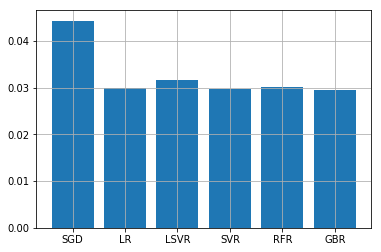

In [13]:
plt.grid()
plt.bar(range(len(class_names)),class_)
plt.xticks(range(len(class_names)), class_names)

# 4. Escolha o melhor algoritmo obtido a partir de cross validation e treine um modelo usando o dataset completo, ou seja, gere um modelo final.

In [14]:
modelGBR = ensemble.GradientBoostingRegressor()
modelGBR.fit(X_f, y_f)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

# 5. Qual a diferença entre Stochastic Gradient Descent e Gradient Descent? 

Em termos relativamente simples, ambos são métodos para atualizar um conjunto de parâmetros de maneira iterativa 
para minimizar uma função de erro. Com Gradient Descent, você usa todos os seus dados para calcular o 
gradiente; com Stochastic Gradient Descent você usa um subconjunto de seus dados. O SGD é muito mais rápido, embora 
a função de erro não seja tão bem minimizada.